In [1]:
### Load PPS model
%run ./PPS_model.ipynb

In [2]:
HCdata = pd.read_excel (r'C:\\Users\\renat\Dissertation\PPS_data_SCZ_SPQ.xlsx',sheet_name='HC') #for an earlier version of Excel, you may need to use the file extension of 'xls'
SCZdata = pd.read_excel (r'C:\\Users\\renat\Dissertation\PPS_data_SCZ_SPQ.xlsx',sheet_name='SCZ') #for an earlier version of Excel, you may need to use the file extension of 'xls'
SPQdata = pd.read_excel (r'C:\\Users\\renat\Dissertation\PPS_data_SCZ_SPQ.xlsx',sheet_name='high spq') #for an earlier version of Excel, you may need to use the file extension of 'xls'

sets = [HCdata,SCZdata,SPQdata]
RTdata = []

for i in sets:
    subjects = i['Subject'].unique()
    delays = i[(i['Sound']=='Loom')&(i['Cond'] != 'Loom_NO')]['Cond'].unique()
    delays = np.delete(delays,np.where(delays=='Loom_-700')[0])
    idx = [3,4,0,1,2]
    delays = delays[idx]
    RTs = []

    for s in subjects:
        meanRTs = []
        for t in delays:
            RT = i[(i['Subject'] == s)&(i['Cond'] == t)]['Rtpul']           
            meanRTs.append(np.mean(RT))
        RTs.append(meanRTs)
    RTdata.append(RTs)
    
HC_RT = np.asarray(RTdata[0])
SCZ_RT = np.asarray(RTdata[1])
SPQ_RT = np.asarray(RTdata[2])

In [3]:
### Audio-tactile experiment simulation setup 

## Calculate distance in cms. Speaker is positioned at 100cm from the hand. 
times = np.asarray([300,800,1500,2200,2700])
timesweep = np.arange(300,2800,100)
ts = timesweep/1000
v = 30 #cm/s 
a_distances = (120 - ts*v) # distance points in cm (network coordinates)

## Simulation setup
simtime = 200 #ms 

## Synapses setup
Wt,Wa,Bt,Ba = Fw(6.5,6.5,2.5,2.5) 
Lt,La = Lw(0.15,0.05,1,4,0.15,0.05,20,80)
bi = 0
pr = 0

In [4]:
idx = [0,5,12,19,24]
distances = np.take(a_distances,idx)
edata = np.mean(SCZ_RT,axis=0)

def sczmodelrun(theta):
    sczRTs,ZMs,ZTs,ZAs = experimentrun(distances,simtime,theta[0],theta[1])
    yf = edata
    xf = sczRTs
    
    m = 5.14942787941318
    bias = 1.288990823894983
    
    cost = np.sum(np.square(np.divide(yf-(m*xf+bias),yf)))
    
    return cost*100000

bounds=[(-3.80,4.5),(0,2.3)]
res = differential_evolution(sczmodelrun, bounds, disp=True)

differential_evolution step 1: f(x)= 3694.38
differential_evolution step 2: f(x)= 3694.38
differential_evolution step 3: f(x)= 3694.38
differential_evolution step 4: f(x)= 3694.38
differential_evolution step 5: f(x)= 3694.38
differential_evolution step 6: f(x)= 3694.38
differential_evolution step 7: f(x)= 3694.38
differential_evolution step 8: f(x)= 3694.38
differential_evolution step 9: f(x)= 3651.26
differential_evolution step 10: f(x)= 3651.26
differential_evolution step 11: f(x)= 3651.26
differential_evolution step 12: f(x)= 3651.26
differential_evolution step 13: f(x)= 3651.26
differential_evolution step 14: f(x)= 3651.26
differential_evolution step 15: f(x)= 3651.26
differential_evolution step 16: f(x)= 3651.26
differential_evolution step 17: f(x)= 3651.26
differential_evolution step 18: f(x)= 3651.26
differential_evolution step 19: f(x)= 3651.26
differential_evolution step 20: f(x)= 3651.26


In [5]:
print(res)

     fun: 3651.2595718148577
 message: 'Optimization terminated successfully.'
    nfev: 633
     nit: 20
 success: True
       x: array([0.09343196, 2.13102381])


In [6]:
idx = [0,5,12,19,24]
distances = np.take(a_distances,idx)
sczRTs,ZMs,ZTs,ZAs = experimentrun(distances,simtime,0.09343196, 2.13102381)

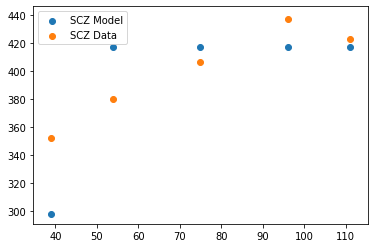

In [7]:
xf = sczRTs
yf = np.mean(SCZ_RT,axis=0)    
m = 5.14942787941318
bias = 1.288990823894983

plt.figure(1)
plt.scatter(distances,m*sczRTs+bias,label = 'SCZ Model')
plt.scatter(distances,yf,label = 'SCZ Data')
plt.legend()

In [8]:
sczres = np.asarray([m*xf+bias,yf])
np.save('altersczrescopy.npy', sczres)

In [9]:
print(sczRTs)
print(m,bias)

[80.8 80.8 80.8 80.8 57.6]
5.14942787941318 1.288990823894983
